In [19]:
# Import the required libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
# Load the data

df = pd.read_csv(r"C:\Users\HP PC\Desktop\dl1\DATA SCIENCE COURSE\PRACTICE\Fugetron\cltv\customer_purchases.csv")

In [3]:
# checking for the top 5 rows 

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# checking for the shape of the data

df.shape

(541909, 8)

In [5]:
# checking for the dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Checking for the percentage null values in dataset

np.round((df.isna().sum()/len(df))*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
# dropping the null values

df.dropna(inplace = True)

In [8]:
df.shape

(406829, 8)

### Calculate the Customer Life Time Value (CLTV) Using 2 Different methods

1. RFM Method
2. Predictive Modelling


### RFM Method (Recency, Frequency, Monetary)

In [9]:
"""
Recency (R): How recently a customer has made a purchase.
Frequency (F): How often a customer makes a purchase.
Monetary (M): How much money a customer has spent.
We'll assign a score to each dimension and then combine them to calculate CLTV.
"""
df1 = df.copy()

# Convert InvoiceDate to datetime
df1['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df1['InvoiceDate']

# Calculate Recency, Frequency, and Monetary
today = df1['InvoiceDate'].max()

In [10]:
# Recency

Recency = []

for i in df1:
    r = (today - df1.groupby('CustomerID')['InvoiceDate'].max()).dt.days
Recency.append(r)
    
print(Recency)

# Creating the datframe
df2 = pd.DataFrame(Recency)
df2 = df2.T
df2.rename(columns = {"InvoiceDate" : "Recency"}, inplace = True)
df2


[CustomerID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
          ... 
18280.0    277
18281.0    180
18282.0      7
18283.0      3
18287.0     42
Name: InvoiceDate, Length: 4372, dtype: int64]


,Recency
CustomerID,
12346.0,325
12347.0,1
12348.0,74
12349.0,18
12350.0,309
...,...
18280.0,277
18281.0,180
18282.0,7


In [11]:
# convert the datatype int to float

df1["Quantity"] = df1["Quantity"].astype(float)

In [12]:
# Frequency
df2['Frequency'] = df1.groupby('CustomerID')['InvoiceNo'].nunique()

# Monetary
df1['Quantity * UnitPrice'] = round(df1['Quantity'] * df1['UnitPrice'],2)
df2['Monetary'] = df1.groupby('CustomerID')['Quantity * UnitPrice'].sum()

# Calculate CLTV using RFM scores
# df2['Recency_Score'] = pd.qcut(df2['Recency'], q=4, labels=[4, 3, 2, 1])
# df2['Frequency_Score'] = pd.qcut(df2['Frequency'].rank(method="first"), q=4, labels=[1, 2, 3, 4])
# df2['Monetary_Score'] = pd.qcut(df2['Monetary'], q=4, labels=[1, 2, 3, 4])

## Calculate CLTV
# df2['CLTV'] = df2['Recency_Score'].astype(int) + df2['Frequency_Score'].astype(int) + df2['Monetary_Score'].astype(int)



In [13]:
df1["Quantity * UnitPrice"].value_counts()

Quantity * UnitPrice
 15.00     20082
 19.80     11033
 17.70      9174
 16.50      8490
 10.20      8028
           ...  
 31.45         1
-58.10         1
 998.40        1
-45.57         1
 66.36         1
Name: count, Length: 3735, dtype: int64

In [14]:
# convert dataframe df2 to csv file

df2.to_csv(r"C:\Users\HP PC\Desktop\dl1\DATA SCIENCE COURSE\PRACTICE\Fugetron\cltv\cltv_df.csv")

In [15]:
df2

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,176.60


In [16]:
# load the csv file

data = pd.read_csv(r"C:\Users\HP PC\Desktop\dl1\DATA SCIENCE COURSE\PRACTICE\Fugetron\cltv\cltv_df.csv")

In [17]:
data

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40
...,...,...,...,...
4367,18280.0,277,1,180.60
4368,18281.0,180,1,80.82
4369,18282.0,7,3,176.60
4370,18283.0,3,16,2094.88


<Axes: xlabel='Recency'>

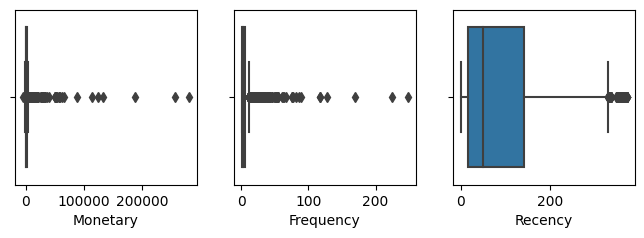

In [20]:
# Detecting the outliers

plt.figure(figsize = (8,5))
plt.subplot(231)
sns.boxplot(x = data["Monetary"])

plt.subplot(232)
sns.boxplot(x= data["Frequency"])

plt.subplot(233)
sns.boxplot(x = data["Recency"])

In [21]:
data["Monetary"].max()

279489.02

### Observations: 
1. Detecting the outliers using boxplot in Monetary, Frequency and Recency columns.
2. By observing the plot we can see that in Monetary and Frequency more outliers are present so treatment of outliers is needed.

In [22]:
# Replace 0 value to 1 because after doing transformation log(0) = infinity

data["Monetary"].replace(0, 1, inplace=True)
data["Recency"].replace(0, 1, inplace=True)

### Treatment of the outliers

In [23]:
### Using Quantiles in statistics (IQR)

# outlier treatment for Monetary
Q1 = data["Monetary"].quantile(0.25)
Q3 = data["Monetary"].quantile(0.75)
IQR = Q3- Q1
data_m = data[(data["Monetary"] >= Q1 - 1.5*IQR) & (data["Monetary"] <= Q1 - 1.5*IQR)]


In [24]:
# outlier treatment for Frequency
Q1 = data["Frequency"].quantile(0.10)
Q3 = data["Frequency"].quantile(0.90)
IQR = Q3- Q1
data_f = data[(data["Frequency"] >= Q1 - 1.5*IQR) & (data["Frequency"] <= Q1 - 1.5*IQR)]

In [25]:
# outlier treatment for Recency
Q1 = data["Recency"].quantile(0.10)
Q3 = data["Recency"].quantile(0.90)
IQR = Q3- Q1
data_r = data[(data["Recency"] >= Q1 - 1.5*IQR) & (data["Recency"] <= Q1 - 1.5*IQR)]

In [26]:
# importing the library

from scipy.stats import zscore
from scipy.stats import boxcox

In [27]:
# finding how many outliers in monetary

zscore_m = zscore(data["Monetary"])
np.where(zscore_m>2,1,0).sum()
np.where(zscore_m>-2,1,0).sum()

4372

In [28]:
# finding how many outliers in frequency

zscore_f = zscore(data["Frequency"])
np.where(zscore_f>2,1,0).sum()
np.where(zscore_f>-2,1,0).sum()

4372

In [29]:
# finding how many outliers in recency

zscore_r = zscore(data["Recency"])
np.where(zscore_r>2,1,0).sum()
np.where(zscore_r>-2,1,0).sum()

4372

In [30]:
# performing log transformation for treatment of outliers

# data["log_m"] = np.log(data["Monetary"])
data["log_r"] = np.log(data["Recency"])



In [31]:
data

,CustomerID,Recency,Frequency,Monetary,log_r
0,12346.0,325,2,1.00,5.783825
1,12347.0,1,7,4310.00,0.000000
2,12348.0,74,4,1797.24,4.304065
3,12349.0,18,1,1757.55,2.890372
4,12350.0,309,1,334.40,5.733341
...,...,...,...,...,...
4367,18280.0,277,1,180.60,5.624018
4368,18281.0,180,1,80.82,5.192957
4369,18282.0,7,3,176.60,1.945910
4370,18283.0,3,16,2094.88,1.098612


In [32]:
# data.drop("log_f", axis = 1, inplace = True)
# data.drop("cube_root_m", axis = 1, inplace = True)


In [33]:
# performing boxcox transformation for treatment of outliers

boxcox_x, boxcox_y = boxcox(data["Frequency"])
data["boxcox_f"] = boxcox(data["Frequency"])[0]

In [34]:
# data[data["Monetary"] <1]

<Axes: >

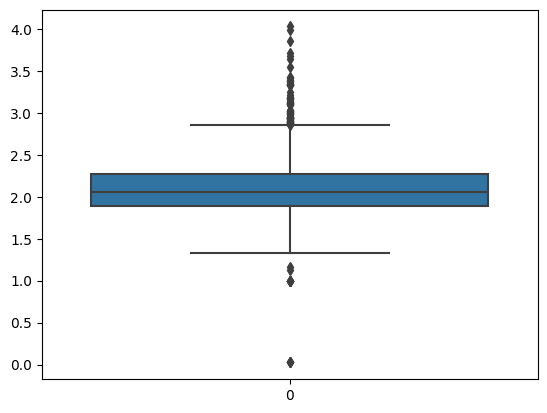

In [35]:
# performing cuberoot transformation for treatment of outliers

# data["cube_root_m"] = data["Monetary"]**(1/3)
sns.boxplot((data["Monetary"]**(1/3))**(1/3))

In [36]:
# In monetary column taking all the negative and equals to zero values as 1

data['tras_Monetary'] = data['Monetary'].apply(lambda x: 1 if x <= 0 else x)

In [37]:
# data[data['tras_Monetary'] <= 0]

In [38]:
# performing boxcox transformation for treatment of outliers

boxcox_mx, boxcox_my = boxcox(data["tras_Monetary"])
data["boxcox_m"] = boxcox(data["tras_Monetary"])[0]

In [39]:
data

,CustomerID,Recency,Frequency,Monetary,log_r,boxcox_f,tras_Monetary,boxcox_m
0,12346.0,325,2,1.00,5.783825,0.619239,1.00,0.000000
1,12347.0,1,7,4310.00,0.000000,1.433779,4310.00,14.206518
2,12348.0,74,4,1797.24,4.304065,1.111291,1797.24,11.993144
3,12349.0,18,1,1757.55,2.890372,0.000000,1757.55,11.939547
4,12350.0,309,1,334.40,5.733341,0.000000,334.40,8.324491
...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,5.624018,0.000000,180.60,7.151212
4368,18281.0,180,1,80.82,5.192957,0.000000,80.82,5.741736
4369,18282.0,7,3,176.60,1.945910,0.920699,176.60,7.110129
4370,18283.0,3,16,2094.88,1.098612,1.812962,2094.88,12.364742


### Preparing for the model

In [40]:
newdata = data[["log_r","boxcox_f" ,"boxcox_m"]]
newdata.head()
newdata.skew()

log_r      -0.615719
boxcox_f    0.112559
boxcox_m    0.262198
dtype: float64

### Resecaling the data



In [41]:
scaler = StandardScaler()

# fit_transform
newdata_rescaled = scaler.fit_transform(newdata)
newdata_rescaled.shape

newdata_rescaled = pd.DataFrame(newdata_rescaled)
newdata_rescaled.columns = ['log_r', 'boxcox_f', 'boxcox_m']
newdata_rescaled.head()

,log_r,boxcox_f,boxcox_m
0,1.367169,-0.285525,-3.261271
1,-2.371503,0.995721,1.393038
2,0.410650,0.488458,0.667897
3,-0.503163,-1.259568,0.650338
4,1.334536,-1.259568,-0.534019


### Finding the Optimal Number of Clusters(n_clusters) using the elbow- method

In [42]:
# this is used to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

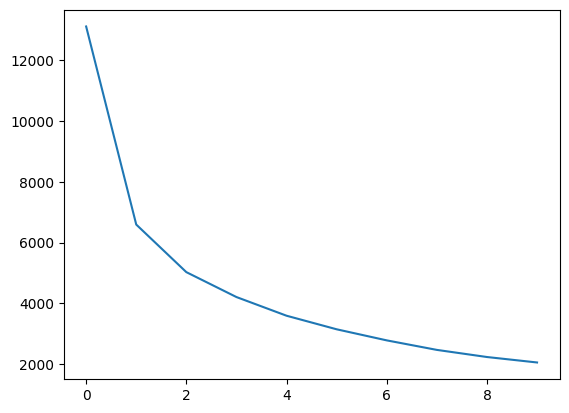

In [47]:
lst = []
range_n_clusters = np.arange(1,11)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(newdata_rescaled)
    lst.append(kmeans.inertia_)
    
# Plotting
plt.plot(lst)

In [54]:
print(lst)

[13116.000000000007, 6593.907761138456, 5026.90823342174, 4206.881781653058, 3591.92646770756, 3144.931160474192, 2780.2018879035472, 2466.724179730345, 2232.1972737459987, 2052.4303908551165]


In [43]:
!pip install kneed


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from kneed import KneeLocator

In [53]:
kl = KneeLocator(range(1,11), lst, curve= 'convex', direction= 'decreasing')
kl.elbow

## By using KneeLocator you can directly find the best elbow value   


3

#### By using Elbow method we identified the best n_clusters in 2

In [575]:
model = KMeans(n_clusters=2 , max_iter=50)
model.fit(newdata_rescaled)

KMeans(max_iter=50, n_clusters=2)

In [576]:
model.labels_ # Display the labels each of the clusters

array([0, 1, 1, ..., 1, 1, 1])

In [577]:
# assign the label
newdata['cluster_id'] = model.labels_
newdata.head()

,log_r,boxcox_f,boxcox_m,cluster_id
0,5.783825,0.619239,0.000000,0
1,0.000000,1.433779,14.206518,1
2,4.304065,1.111291,11.993144,1
3,2.890372,0.000000,11.939547,0
4,5.733341,0.000000,8.324491,0


In [578]:
newdata["cluster_id"].value_counts(normalize=True)

cluster_id
0    0.559012
1    0.440988
Name: proportion, dtype: float64

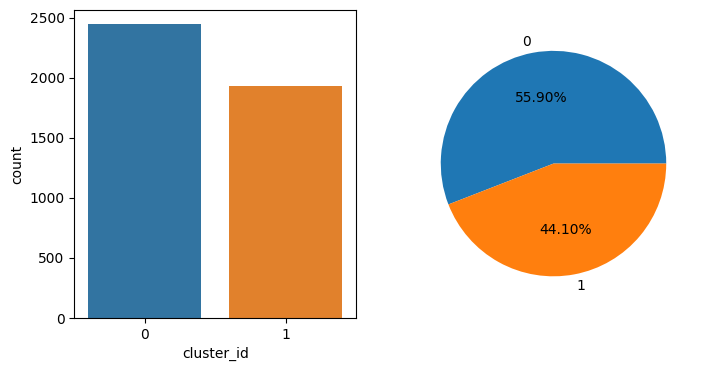

In [588]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.countplot(x= newdata["cluster_id"])
plt.subplot(122)
plt.pie(newdata["cluster_id"].value_counts().values, labels=newdata["cluster_id"].value_counts().index, autopct='%.2f%%');

By observing the above plots we can see that target variable is normally distributed

Text(0.5, 1.0, 'K Mean Clustering')

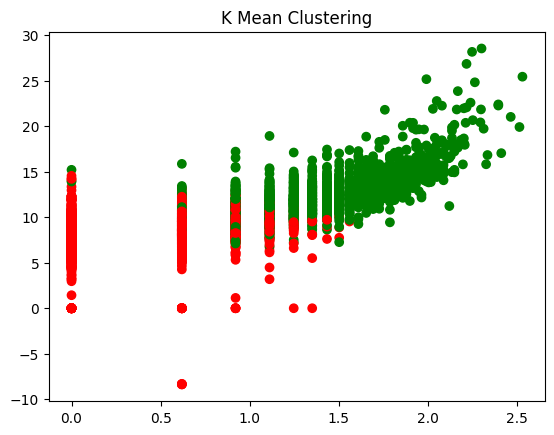

In [581]:
# Create a colormap
colormap = np.array(['red', 'green'])
 
# Plot the Original Classifications
plt.scatter(newdata["boxcox_f"], newdata["boxcox_m"], c=colormap[model.labels_])
plt.title('K Mean Clustering')

<Axes: xlabel='cluster_id', ylabel='boxcox_m'>

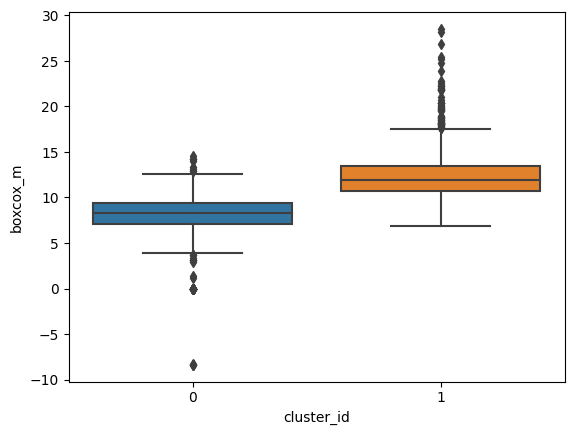

In [582]:
sns.boxplot(x=newdata["cluster_id"], y=newdata["boxcox_m"])

cluster1 and cluster2 are normally distributed

In [583]:
newdata

,log_r,boxcox_f,boxcox_m,cluster_id
0,5.783825,0.619239,0.000000,0
1,0.000000,1.433779,14.206518,1
2,4.304065,1.111291,11.993144,1
3,2.890372,0.000000,11.939547,0
4,5.733341,0.000000,8.324491,0
...,...,...,...,...
4367,5.624018,0.000000,7.151212,0
4368,5.192957,0.000000,5.741736,0
4369,1.945910,0.920699,7.110129,1
4370,1.098612,1.812962,12.364742,1


### Model Building

### segregate the input and target variable

In [589]:
X = newdata[["log_r","boxcox_f","boxcox_m"]]
y = newdata["cluster_id"]

### Separating the train and test data

In [591]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3279, 3) (3279,)
(1093, 3) (1093,)


### Applying the Transformation techniques on train data

In [593]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Rescaling the train Numerical data.
X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train),
                                      columns= X_train.columns,
                                      index= X_train.index)

X_train_transformed.head()

,log_r,boxcox_f,boxcox_m
2344,1.148777,-1.263017,-0.685081
418,1.272511,-1.263017,-0.467306
3778,0.402126,-0.290016,-0.263776
257,-0.881518,0.696529,0.325402
295,-0.664246,1.500138,1.811176


### Applying the Transformation techniques on test data

In [594]:
# Rescaling the test Numerical data.
X_test_transformed = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_transformed.head()

,log_r,boxcox_f,boxcox_m
2014,1.090563,0.696529,0.137221
457,0.436573,0.483139,-0.406557
478,1.325434,-1.263017,-1.229074
438,-0.538872,-0.290016,-0.259647
3728,-0.819973,0.483139,0.009583


### Training - Decision Tree Classifier

In [604]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

# Prediction
y_test_pred = classifier.predict(X_test_transformed)

# Evaluation of prediction
Accuracy_DT = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_DT*100 )


# Randomly checking wheather model predicted the correct classification or not
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

DecisionTreeClassifier()

Accuracy:  98.26166514181153


,Actual,Predicted
2014,0,0
457,0,0
478,0,0
438,0,0
3728,1,1


### Training - Logistic Regression

In [605]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

# Prediction
y_test_pred = classifier.predict(X_test_transformed)

# Evaluation of prediction
Accuracy_LR = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_LR*100 )


# Randomly checking wheather model predicted the correct classification or not
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

LogisticRegression()

Accuracy:  99.81701738334858


,Actual,Predicted
2014,0,0
457,0,0
478,0,0
438,0,0
3728,1,1


### Training - Ramdom Forest Classifier

In [606]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

# Prediction
y_test_pred = classifier.predict(X_test_transformed)

# Evaluation of prediction
Accuracy_RFC = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_RFC*100 )


# Randomly checking wheather model predicted the correct classification or not
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

RandomForestClassifier()

Accuracy:  98.81061299176578


,Actual,Predicted
2014,0,0
457,0,0
478,0,0
438,0,0
3728,1,1


In [609]:
df_data = [['Logistic Regression', Accuracy_LR],
                   ['Decision Tree Classifier', Accuracy_DT],
                   ['Random Forest Classifier ',Accuracy_RFC]]

data = pd.DataFrame(df_data, columns = ['Algorithm','Accuracy_score'])
data

,Algorithm,Accuracy_score
0,Logistic Regression,0.998170
1,Decision Tree Classifier,0.982617
2,Random Forest Classifier,0.988106


<Axes: xlabel='Accuracy_score', ylabel='Algorithm'>

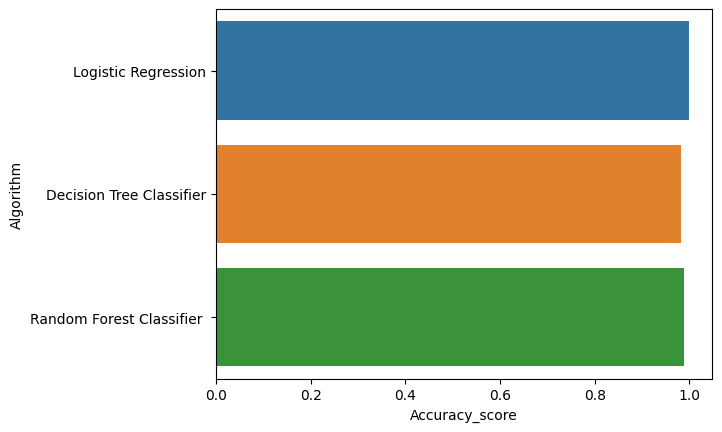

In [611]:
sns.barplot(y=data.Algorithm, x = data.Accuracy_score)

### Observation: 

- By Observing the above table we can say that Logistic Regression or Random forest Classifier are the best algorithm for this data.
- Logistic Regression and Random Forest Classifiers's Accuracy is approximately similar.